# Objective



The main objective of this prediction is to build model which predicts whether customer cancel their booking or not, and use some explanation methods to analyze the reasons of customer behavior.

# Importing necessary libraries

In [1]:
import pandas as pd # read data
import numpy as np
import matplotlib.pyplot as plt # visuasation
import seaborn as sns # visuasation
from sklearn import metrics
from sklearn.model_selection import GridSearchCV  # Gridsearch 
from sklearn.metrics import accuracy_score,recall_score  # evaluation of model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.ensemble import AdaBoostClassifier # 
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.feature_selection import RFE  # Feature selection
import statsmodels.api as smapi  # Logistic Regression
from sklearn.metrics import confusion_matrix,classification_report   # evaluation through confusion matrix
from sklearn.model_selection import train_test_split,cross_val_score # split the dataset into train and test
import warnings
warnings.filterwarnings('ignore')
from sklearn import neighbors # KNN model
from sklearn import preprocessing  # Standardization

# Read the data

In [2]:
path= '/home/seema/Downloads/cloudera-quickstart-vm-5.13 (1).0-0-virtualbox/hotel_bookings.csv'

hotel=pd.read_csv(path)

# Data Visualisation & EDA

In [3]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
# information of a dataset
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel.shape

(119390, 32)

In [164]:
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [179]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,0.274969,79.911686,2016.210290,26.839533,15.815360,1.005448,2.625798,1.875953,0.138675,0.010828,0.039087,0.030422,0.184045,0.271672,81.011194,0.749788,106.346935,0.084251,0.698638
std,0.446501,86.056471,0.686116,13.673204,8.834842,1.031974,2.053692,0.626473,0.455933,0.113613,0.193802,0.369200,1.732148,0.727335,109.941520,10.017213,55.004259,0.281571,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


# Function to  split columns into numeric and factor

In [7]:

# function to  split col into numeric and factor
def splitcols(data):
    nc=data.select_dtypes(exclude='object').columns.values
    fc=data.select_dtypes(include='object').columns.values

    return(nc,fc)

In [8]:
# execute function
nc,fc = splitcols(hotel)

In [9]:
# numeric column
nc

array(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests'],
      dtype=object)

In [10]:
# object column
fc

array(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'], dtype=object)

In [11]:
# value counts of object column
for c in fc:
    counts=hotel[c].value_counts()
    print('.....')
    print('features ',c)
    print(counts)

.....
features  hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
.....
features  arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
.....
features  meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
.....
features  country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MLI        1
BWA        1
PLW        1
ATF        1
FJI        1
Name: country, Length: 177, dtype: int64
.....
features  market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64
.....
f

In [12]:
# Unique value of factor variables
for c in fc:
    print('Factor variable=',c)
    print(hotel[c].unique())
    print('----')

Factor variable= hotel
['Resort Hotel' 'City Hotel']
----
Factor variable= arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----
Factor variable= meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----
Factor variable= country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI'

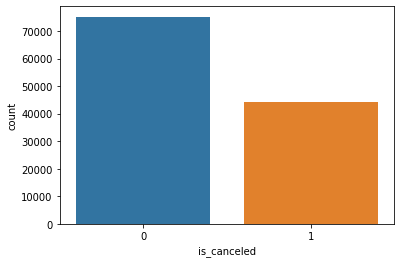

In [13]:
# distribution of y variable
sns.countplot(hotel.is_canceled)

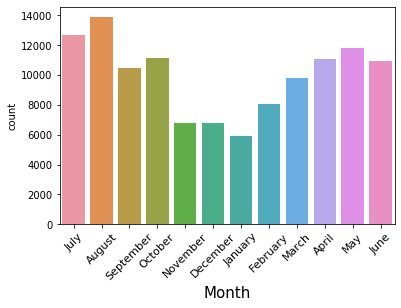

In [14]:
sns.countplot(data=hotel, x = 'arrival_date_month')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

From this count graph we can see that busiest month is August and least busiest is January

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

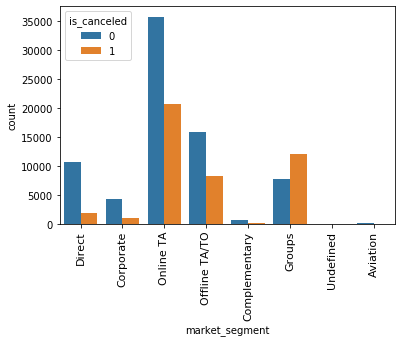

In [15]:
sns.countplot(data=hotel, x = 'market_segment',hue='is_canceled')
plt.xticks(rotation=90,fontsize=11)

 We all know in current people use of technology are masively increased and we can see in the above plot that almost 50 percent of reservations are apply via Online Travel Agents

Text(0, 0.5, 'count')

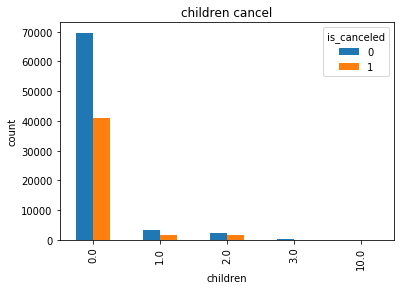

In [16]:
pd.crosstab(hotel['children'],hotel['is_canceled']).plot(kind='bar')
plt.title('children cancel')
plt.xlabel('children')
plt.ylabel('count')


Where their is no children ,their is less chance of hotel booking  cancellation

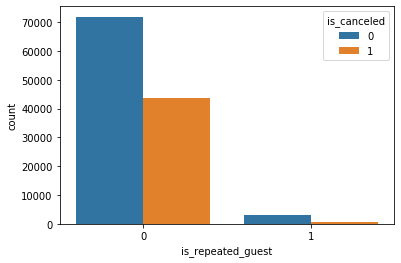

In [17]:
  sns.countplot(x=hotel.is_repeated_guest ,data=hotel,hue=hotel.is_canceled) 


From this graph we found not repeated guests are very less likely to cancel their booking

(array([0, 1]), <a list of 2 Text xticklabel objects>)

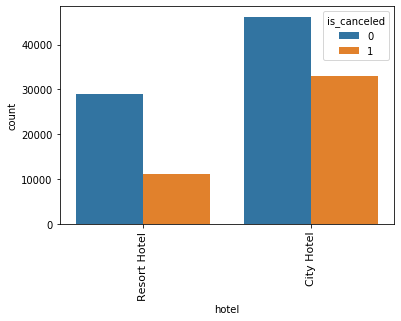

In [18]:
sns.countplot(data=hotel, x = 'hotel',hue='is_canceled')
plt.xticks(rotation=90,fontsize=11)


Text(0.5, 1.0, 'is_canceled vs adults')

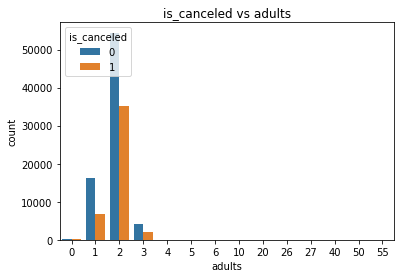

In [19]:
sns.countplot(hotel.adults,hue=hotel.is_canceled)
plt.title('is_canceled vs adults')

Nearly half of the booking is cancelled where no of adults are 2

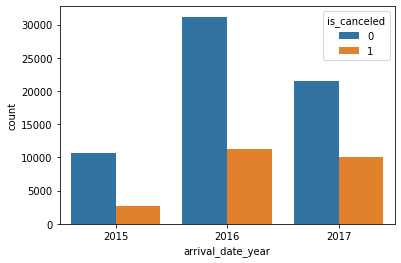

In [176]:
sns.countplot(hotel.arrival_date_year,hue=hotel.is_canceled)



Maximum booking accured in 2016 and least in 2015

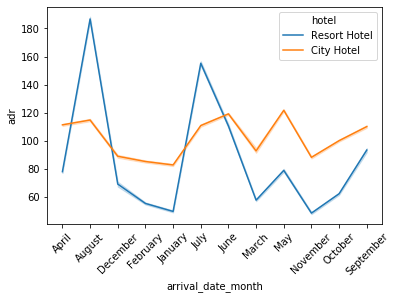

In [21]:
sns.lineplot(data=hotel, x= 'arrival_date_month', y = 'adr', hue='hotel',)
plt.xticks(rotation=45,fontsize=10);

This plot shows that in August which was the crowdest month, City hotel charge guests the most.¶

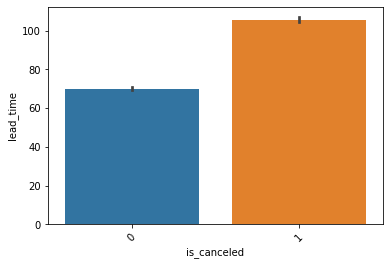

In [178]:
sns.barplot(data=hotel, x= 'is_canceled', y = 'lead_time')
plt.xticks(rotation=45,fontsize=10);

This plot shows that where the lead_time is more there the chance of cancelation is more¶

# Data Cleaning 

In [22]:
# checking for nulls
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [23]:
# check the % of nulls

hotel. isnull(). sum() * 100 / len(hotel)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

 company variable contains 94% nulls so we can dropped this
we have to handel nulls in agent,children and country 

In [24]:
hotel= hotel.drop(['company'],axis=1)

In [25]:
# check the shape of nulls 
hotel.shape

(119390, 31)

In [26]:
# agent and country is a categorical column so we can replace null with mode

In [27]:
# # since their is no agent we can will null with 0
hotel.agent=hotel.agent.fillna(0)

In [28]:
# country
hotel.country=hotel.country.fillna('PRT')

In [29]:
hotel.children=hotel.children.fillna(0)

In [30]:
#  check nulls after imputing nulls
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 




# check duplicates in dataset

In [31]:
# data is too large their is a chance of duplicates
hotel.duplicated().sum()

32020

In [32]:
# there are 32001 nulls so we dropped it
hotel=hotel.drop_duplicates()

In [33]:
# after dropping duplicates check the shape of data
hotel.shape

(87370, 31)

In [34]:
nc,fc=splitcols(hotel)

# Histogram

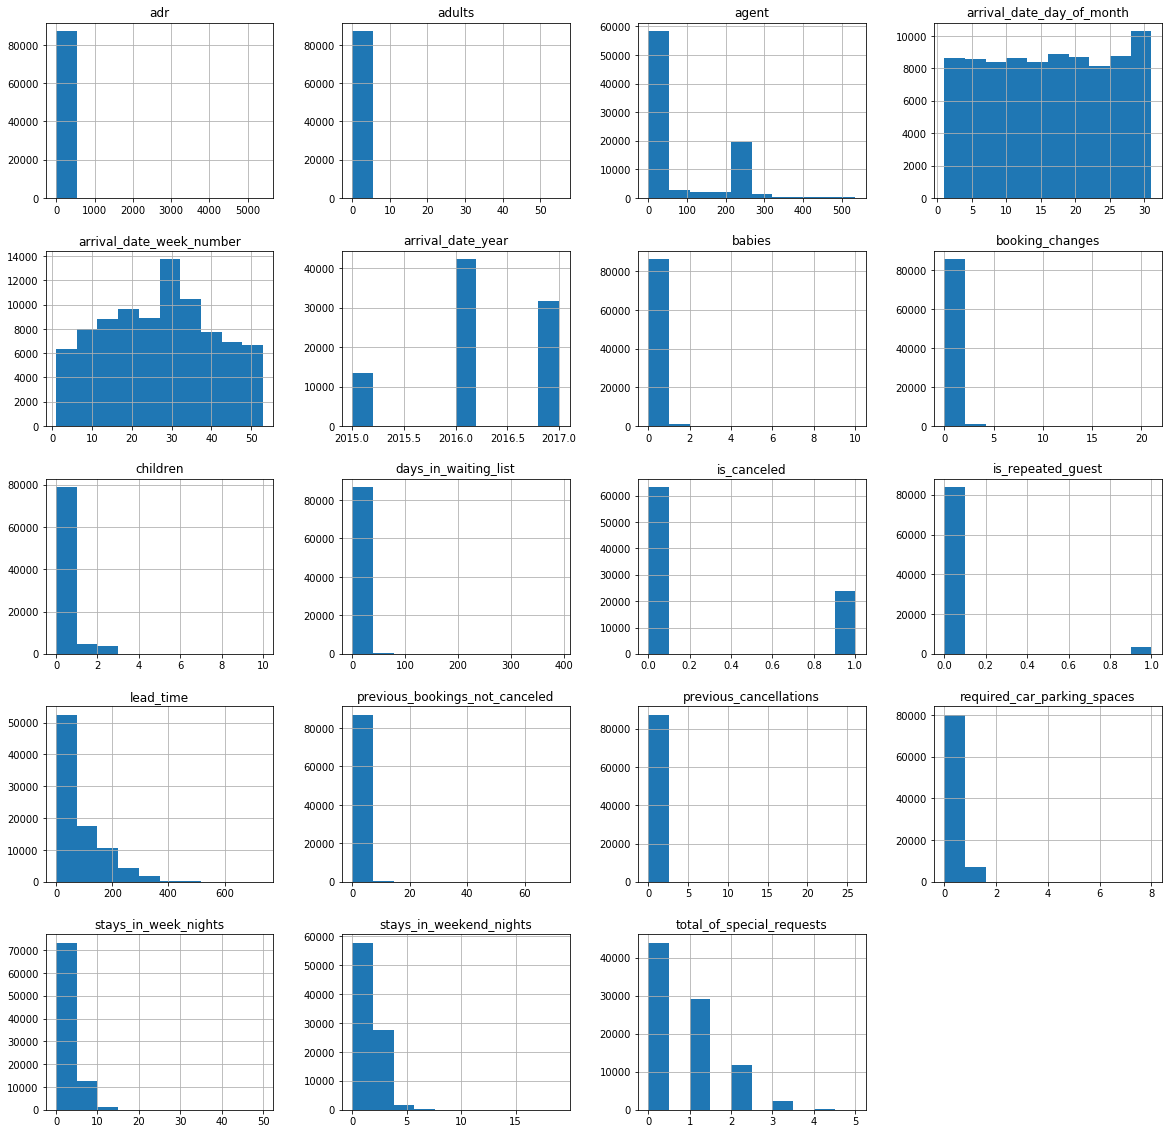

In [35]:
hotel.hist(figsize=(20,20))
plt.show()

# Boxplot(identify the outliers and removing it)


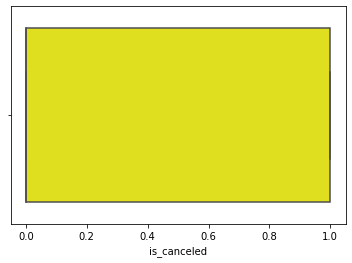

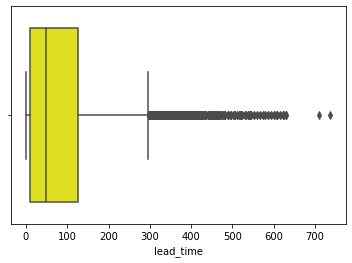

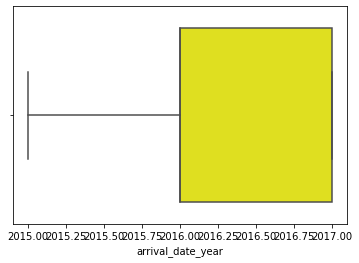

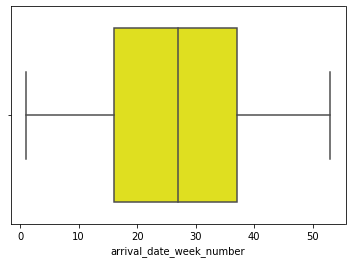

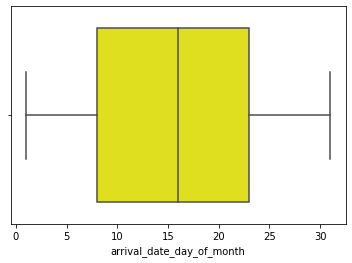

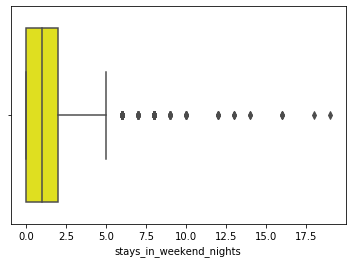

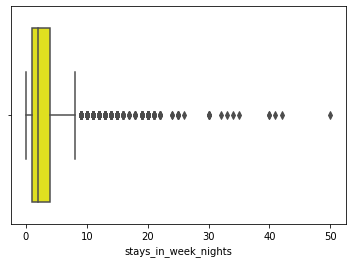

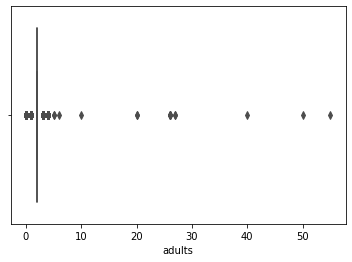

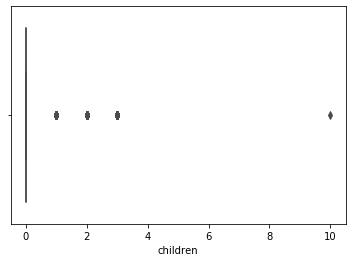

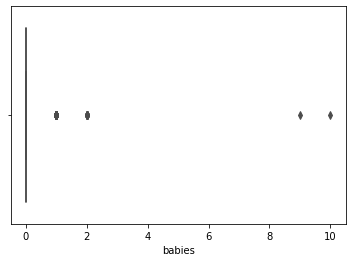

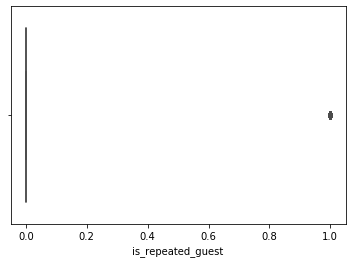

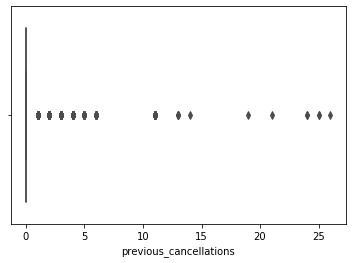

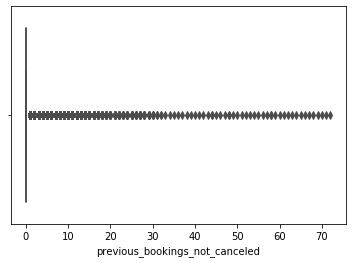

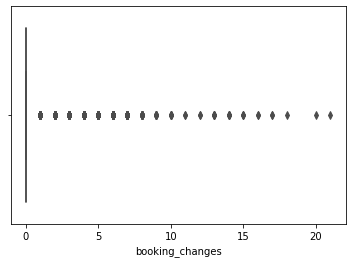

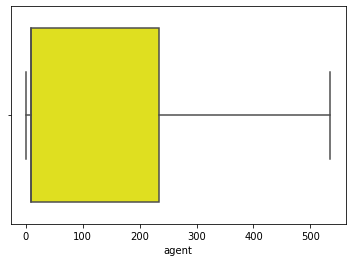

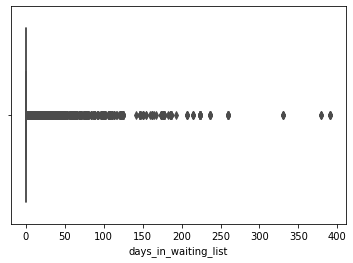

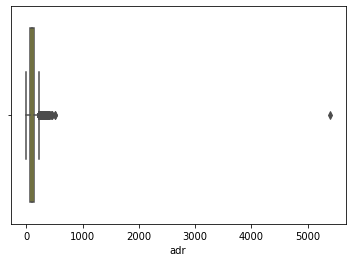

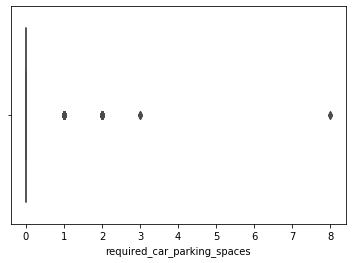

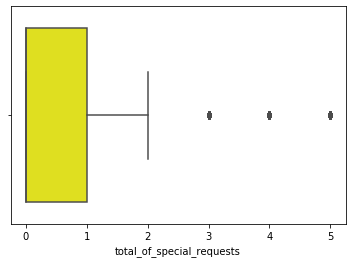

In [36]:
# their are many feature which contain outliers we can handel it sepretly
for c in nc:
    fig=plt.figure()
    sns.boxplot(hotel[c],color='yellow')

there are many features which contain outliers we can handel it sepretly

# Copy of a dataset for backup

In [37]:
hotel1=hotel.copy()

In [38]:

for i in hotel1.lead_time:
    q1=hotel1.lead_time.quantile(0.25)
    q3=hotel1.lead_time.quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    if i > upper_limit or i < lower_limit:
        hotel1.lead_time=hotel1.lead_time.replace(i,np.random.randint(lower_limit,upper_limit))

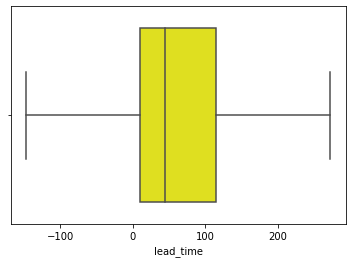

In [39]:
sns.boxplot(hotel1.lead_time,color='yellow')

 boxplot after removing outliers in lead_time lead_time

In [40]:
# weekend night
for i in hotel1.stays_in_weekend_nights:
    q1=hotel1.stays_in_weekend_nights.quantile(0.25)
    q3=hotel1.stays_in_weekend_nights.quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    if i > upper_limit or i < lower_limit:
        hotel1.stays_in_weekend_nights=hotel1.stays_in_weekend_nights.replace(i,np.random.randint(lower_limit,upper_limit))

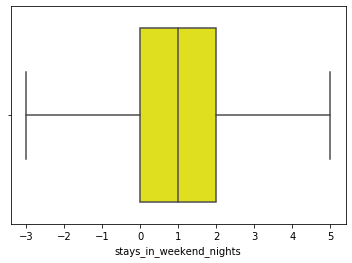

In [41]:
sns.boxplot(hotel1.stays_in_weekend_nights,color='yellow')

 boxplot after removing outliers in stays_in_weekend_nights

In [42]:
for i in hotel1.stays_in_week_nights:
    q1=hotel1.stays_in_week_nights.quantile(0.25)
    q3=hotel1.stays_in_week_nights.quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    if i > upper_limit or i < lower_limit:
        hotel1.stays_in_week_nights=hotel1.stays_in_week_nights.replace(i,np.random.randint(lower_limit,upper_limit))

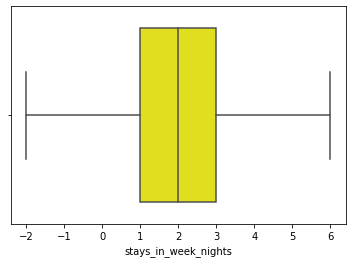

In [43]:
sns.boxplot(hotel1.stays_in_week_nights,color='yellow')

 boxplot after removing outliers in stays_in_week_nights


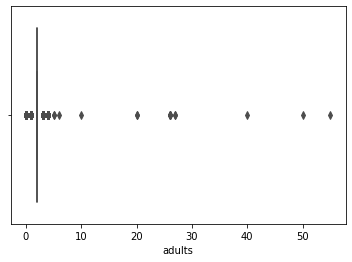

In [44]:
sns.boxplot(hotel1.adults,color='yellow')

In [45]:
# it is imposible to have 0 no of adults 
hotel1.adults[hotel1.adults<=0]=np.random.randint(1,5)

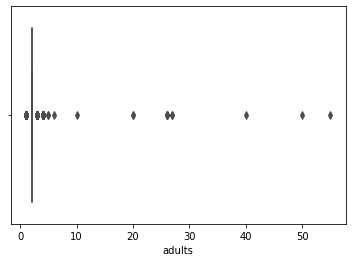

In [46]:
sns.boxplot(hotel1.adults,color='yellow')

In [47]:
hotel1.adults[hotel1.adults>=9]=np.random.randint(1,10)

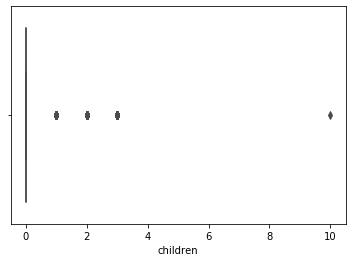

In [48]:
sns.boxplot(hotel1.children,color='yellow')

In [49]:
hotel1.adults[hotel1.children>=4]=np.random.randint(0,4)

In [50]:
hotel1.children=hotel1.children.fillna(0)

In [51]:
hotel1.children.value_counts()

0.0     79006
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [52]:
hotel1.babies.value_counts()

0     86456
1       897
2        15
10        1
9         1
Name: babies, dtype: int64

In [53]:
hotel1.babies[hotel1.babies>=3]=np.random.randint(0,3)

In [54]:
hotel1.babies.value_counts()

0    86458
1      897
2       15
Name: babies, dtype: int64

In [55]:
hotel1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [56]:
hotel1.children=hotel1.children.fillna(0)

In [57]:
hotel1.babies=hotel1.babies.fillna(0)

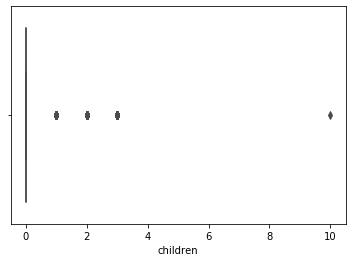

In [58]:
sns.boxplot(hotel1.children,color='yellow')

In [59]:
hotel1.babies[hotel1.babies>2]=hotel1.babies.mode()

In [60]:
hotel.total_of_special_requests.value_counts()

0    43876
1    29012
2    11810
3     2316
4      320
5       36
Name: total_of_special_requests, dtype: int64

In [61]:
hotel2=hotel1.copy()

In [62]:
hotel2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# Correlation Matrix (Heatmap)

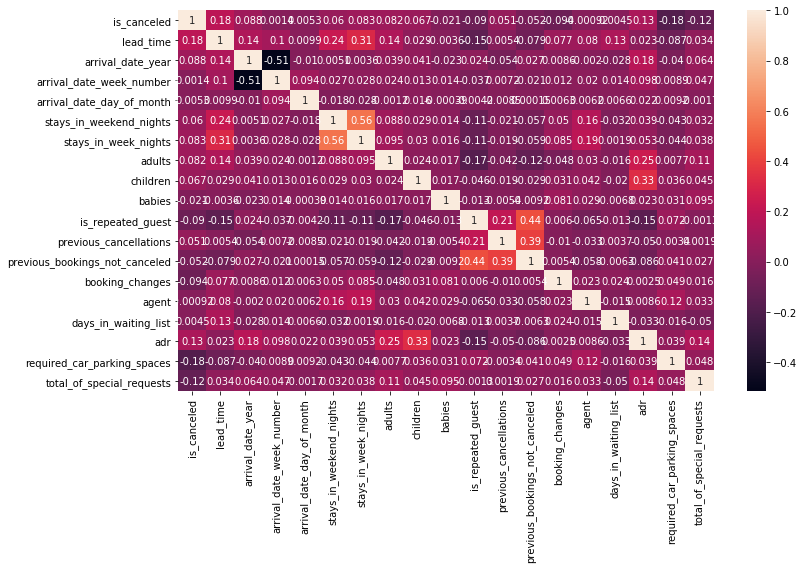

In [63]:
plt.figure(figsize=(12,7))
correlation = hotel[nc].corr()
sns.heatmap(correlation, annot = True)

In [64]:
hotel.corr()['is_canceled']

is_canceled                       1.000000
lead_time                         0.184689
arrival_date_year                 0.088024
arrival_date_week_number          0.001406
arrival_date_day_of_month         0.005300
stays_in_weekend_nights           0.060066
stays_in_week_nights              0.082816
adults                            0.081677
children                          0.067327
babies                           -0.020559
is_repeated_guest                -0.089681
previous_cancellations            0.051458
previous_bookings_not_canceled   -0.052174
booking_changes                  -0.093702
agent                            -0.000920
days_in_waiting_list              0.004453
adr                               0.127955
required_car_parking_spaces      -0.184269
total_of_special_requests        -0.120602
Name: is_canceled, dtype: float64

In [65]:
column_for_delete=['days_in_waiting_list','arrival_date_year','assigned_room_type','booking_changes','required_car_parking_spaces','reservation_status']


In [66]:
hotel2.drop(column_for_delete, axis = 1, inplace = True)

In [67]:
hotel2.shape

(87370, 25)

In [68]:
hotel2['total_stays'] =hotel2['stays_in_weekend_nights'] + hotel2['stays_in_week_nights']

In [69]:
hotel2['meal'] = hotel2['meal'].str.replace('Undefined', 'SC')
hotel2['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [70]:
hotel2.reservation_status_date=pd.to_datetime(hotel2.reservation_status_date)

In [71]:
hotel2['reservation_year'] = hotel2['reservation_status_date'].dt.year
hotel2['reservation_month'] = hotel2['reservation_status_date'].dt.month
hotel2['reservation_day'] = hotel2['reservation_status_date'].dt.day

In [72]:
hotel2.drop(columns=['reservation_status_date','stays_in_weekend_nights','stays_in_week_nights','arrival_date_month'],axis=1,inplace=True)

In [73]:
nc,fc=splitcols(hotel2)

In [74]:
hotel2[nc].shape

(87370, 17)

In [75]:
nc,fc=splitcols(hotel2)

# Use Label Encoder to convert object variabe into numeic 

In [76]:
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for i in fc:   
    hotel2[i]= le.fit_transform(hotel2[i])

# Function for split data into train and test

In [77]:
def splitdata(data,y,ratio=0.2,random_state=123):
    trainx,testx,trainy,testy=train_test_split(data.drop(y, 1),data[y], 
                                                          test_size=ratio,random_state=123)
    return(trainx,trainy,testx,testy)

In [78]:
trainx1,trainy1,testx1,testy1=splitdata(hotel2,'is_canceled')


# Function for confusion matrix,classification report

In [79]:
def cm(actual,pred):
    # model accuracy
    print("Model Accuracy = {}".format(accuracy_score(actual,pred)))
    print("\n")
    
    # confusion matrix
    df = pd.DataFrame({'actual':actual,'pred':pred})
    print(pd.crosstab(df.actual,df.pred,margins=True))
    print("\n")
    
    # classification report
    print(classification_report(actual,pred))
    
    return(1)

# Model Building

# Decision Tree

In [80]:
model_DT=DecisionTreeClassifier().fit(trainx1,trainy1)

In [81]:
p_DT=model_DT.predict(testx1)   

In [82]:
cm(testy1,p_DT)

Model Accuracy = 0.9282362366945176


pred        0     1    All
actual                    
0       12036   621  12657
1         633  4184   4817
All     12669  4805  17474


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     12657
           1       0.87      0.87      0.87      4817

    accuracy                           0.93     17474
   macro avg       0.91      0.91      0.91     17474
weighted avg       0.93      0.93      0.93     17474



1

In [83]:
accurcy_dt=accuracy_score(testy1,p_DT)*100

In [84]:
accurcy_dt

92.82362366945176

In [162]:
recall_dt=recall_score(testy1,p_DT)*100

In [163]:
recall_dt

86.85904089682374

# Important feature 

In [85]:
# Feature Scaling
from sklearn.feature_selection import RFE

In [86]:
impf=pd.DataFrame({'feature':trainx1.columns,'score':model_DT.feature_importances_})

In [87]:
impf=impf.sort_values('score',ascending=False)

In [88]:
impf

,feature,score
2,arrival_date_week_number,0.285786
22,reservation_month,0.123648
23,reservation_day,0.100274
1,lead_time,0.092867
3,arrival_date_day_of_month,0.062878
19,total_of_special_requests,0.058394
8,country,0.050795
9,market_segment,0.050205
15,deposit_type,0.038088
18,adr,0.030145


In [89]:
unimportnt_feature=['previous_bookings_not_canceled','customer_type','children','babies','adults','reserved_room_type','meal','distribution_channel','hotel','is_repeated_guest']

In [90]:
hotel2.drop(unimportnt_feature, axis = 1, inplace = True)

In [91]:
hotel2.shape

(87370, 15)

# Grid Search

In [92]:
trainx1,trainy1,testx1,testy1=splitdata(hotel2,'is_canceled')

In [93]:
# create an instance of the decision tree classifier class
dtclf=DecisionTreeClassifier()

In [94]:
params={'criterion':['gini','entropy'],
       'max_depth':np.arange(2,16),
       'min_samples_leaf':np.arange(2,16),
       'min_samples_split':np.arange(2,16) }

In [95]:
grid=GridSearchCV(dtclf,param_grid=params,scoring='accuracy',
                  cv=3,n_jobs=-1).fit(trainx1,trainy1)

In [96]:
# check for the combination of param that give best accuracy
grid.best_params_, grid.best_score_


({'criterion': 'gini',
  'max_depth': 15,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 0.902626728194872)

In [97]:
# build model using the grid search  result for best params
model_dt_grid=DecisionTreeClassifier(criterion='gini', max_depth=15,min_samples_leaf=2,min_samples_split=2).fit(trainx1,trainy1)

In [98]:
# predict on test data
p_grid_dt=model_dt_grid.predict(testx1)  

In [99]:
cm(testy1,p_grid_dt)

Model Accuracy = 0.9095227194689253


pred        0     1    All
actual                    
0       12319   338  12657
1        1243  3574   4817
All     13562  3912  17474


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12657
           1       0.91      0.74      0.82      4817

    accuracy                           0.91     17474
   macro avg       0.91      0.86      0.88     17474
weighted avg       0.91      0.91      0.91     17474



1

In [100]:
accurcy_grid_dt=accuracy_score(testy1,p_grid_dt)*100

In [101]:
accurcy_grid_dt

90.95227194689252

# Random Forest

In [102]:
model_rf=RandomForestClassifier(n_estimators=100,max_features=2).fit(trainx1,trainy1)

In [103]:
p_rf=model_rf.predict(testx1)

In [104]:
cm(testy1,p_rf)

Model Accuracy = 0.9419137003548128


pred        0     1    All
actual                    
0       12571    86  12657
1         929  3888   4817
All     13500  3974  17474


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12657
           1       0.98      0.81      0.88      4817

    accuracy                           0.94     17474
   macro avg       0.95      0.90      0.92     17474
weighted avg       0.94      0.94      0.94     17474



1

In [105]:
accurcy_rf=accuracy_score(testy1,p_rf)*100

In [106]:
accurcy_rf

94.19137003548128

# Adaboosting

In [107]:

model_ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100).fit(trainx1,trainy1)


In [108]:
p_ada=model_ada.predict(testx1)

In [109]:
cm(testy1,p_ada)

Model Accuracy = 0.8068559001945748


pred        0     1    All
actual                    
0       11698   959  12657
1        2416  2401   4817
All     14114  3360  17474


              precision    recall  f1-score   support

           0       0.83      0.92      0.87     12657
           1       0.71      0.50      0.59      4817

    accuracy                           0.81     17474
   macro avg       0.77      0.71      0.73     17474
weighted avg       0.80      0.81      0.79     17474



1

In [110]:
accurcy_ada=accuracy_score(testy1,p_ada)*100

In [111]:
accurcy_ada

80.68559001945748

In [112]:
hotel_std=hotel2.copy()

# Data Preprocessing (Standard Scaler)

In [113]:
ss = preprocessing.StandardScaler()
sv = ss.fit_transform(hotel_std.iloc[:,:])
hotel_std.iloc[:,:] = sv


In [114]:
# restore the original Y-value in the data_std
hotel_std.is_canceled = hotel2.is_canceled

In [115]:
hotel_std.head(10)

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,country,market_segment,previous_cancellations,deposit_type,agent,adr,total_of_special_requests,total_stays,reservation_year,reservation_month,reservation_day
0,0,1.100861,0.011736,-1.676934,1.076086,-1.542891,-0.082401,-0.111309,-0.736861,-1.933442,-0.839768,-1.643665,-1.744638,0.226397,-1.679467
1,0,-0.051158,0.011736,-1.676934,1.076086,-1.542891,-0.082401,-0.111309,-0.736861,-1.933442,-0.839768,-1.643665,-1.744638,0.226397,-1.679467
2,0,-0.846601,0.011736,-1.676934,-0.623217,-1.542891,-0.082401,-0.111309,-0.736861,-0.569903,-0.839768,-1.143008,-1.744638,0.226397,-1.565724
3,0,-0.764314,0.011736,-1.676934,-0.623217,-2.286538,-0.082401,-0.111309,2.028261,-0.569903,-0.839768,-1.143008,-1.744638,0.226397,-1.565724
4,0,-0.750599,0.011736,-1.676934,-0.623217,0.688050,-0.082401,-0.111309,1.446130,-0.151752,0.362239,-0.642351,-1.744638,0.226397,-1.451981
6,0,-0.942602,0.011736,-1.676934,1.076086,-1.542891,-0.082401,-0.111309,-0.736861,0.011873,-0.839768,-0.642351,-1.744638,0.226397,-1.451981
7,0,-0.819172,0.011736,-1.676934,1.076086,-1.542891,-0.082401,-0.111309,2.019165,-0.060849,0.362239,-0.642351,-1.744638,0.226397,-1.451981
8,1,0.223132,0.011736,-1.676934,1.076086,0.688050,-0.082401,-0.111309,1.446130,-0.442640,0.362239,-0.141693,-1.744638,-0.392539,-1.110752
9,1,0.085987,0.011736,-1.676934,1.076086,-0.055597,-0.082401,-0.111309,-0.600424,-0.015398,-0.839768,-0.141693,-1.744638,-0.702008,0.709133
10,1,-0.627168,0.011736,-1.676934,1.076086,0.688050,-0.082401,-0.111309,1.446130,0.302761,-0.839768,0.358964,-1.744638,-0.083071,0.822876


# KNN (standard Scaler)

In [116]:
trainx2,trainy2,testx2,testy2=splitdata(hotel_std,'is_canceled')

In [117]:
# cross-validation to determine the best K
cv_accuracy = []

n_list = np.arange(3,12,2); n_list

for n in n_list:
    model = neighbors.KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(model,trainx2,trainy2,cv=6,scoring='accuracy')
    cv_accuracy.append(scores.mean() )

print(cv_accuracy)  


[0.8949439427036724, 0.8946005164657064, 0.8915961018100863, 0.8889063414359771, 0.8864884654886965]


In [118]:
bestK = n_list[cv_accuracy.index(max(cv_accuracy))]
print("best K = ", bestK)

best K =  3


Text(0.5, 1.0, 'Accuracy - Neighbours')

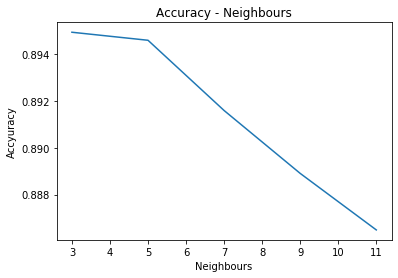

In [119]:
# plot the Accuracy vs Neighbours to determine the best K
plt.plot(n_list,cv_accuracy)
plt.xlabel("Neighbours")
plt.ylabel("Accyuracy")
plt.title("Accuracy - Neighbours")

In [120]:
model_knn= neighbors.KNeighborsClassifier(n_neighbors=bestK,metric = "manhattan").fit(trainx2,trainy2)

In [121]:
# predict on test data
p_knn_std = model_knn.predict(testx2)

In [122]:
cm(testy2,p_knn_std)

Model Accuracy = 0.9053450841249857


pred        0     1    All
actual                    
0       12391   266  12657
1        1388  3429   4817
All     13779  3695  17474


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12657
           1       0.93      0.71      0.81      4817

    accuracy                           0.91     17474
   macro avg       0.91      0.85      0.87     17474
weighted avg       0.91      0.91      0.90     17474



1

In [123]:
accurcy_knn_std=accuracy_score(testy2,p_knn_std)*100

In [124]:
accurcy_knn_std

90.53450841249857

In [125]:
hotel_maxmin=hotel2.copy()

In [126]:
#  standardize using MinMax Scaler
mm=preprocessing.MinMaxScaler()

sv = mm.fit_transform(hotel_maxmin.iloc[:,:])
hotel_maxmin.iloc[:,:] = sv

In [127]:
# restore the original Y-value in the data_std
hotel_maxmin.is_canceled = hotel2.is_canceled

# KNN (Maxmin Scaler)

In [128]:
trainx2,trainy2,testx2,testy2=splitdata(hotel_maxmin,'is_canceled')

In [129]:
# cross-validation to determine the best K
cv_accuracy = []

n_list = np.arange(3,12,2); n_list

for n in n_list:
    model = neighbors.KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(model,trainx2,trainy2,cv=5,scoring='accuracy')
    cv_accuracy.append(scores.mean() )

print(cv_accuracy)  

[0.9192943461789864, 0.9159608102118435, 0.9128705197587921, 0.9095656134927917, 0.9066040794279504]


In [130]:
bestK= n_list[cv_accuracy.index(max(cv_accuracy))]
print("best K = ", bestK)

best K =  3


In [131]:
model_knn_maxmin= neighbors.KNeighborsClassifier(n_neighbors=bestK,metric = "manhattan").fit(trainx2,trainy2)

In [132]:
p_knn_maxmin = model_knn_maxmin.predict(testx2)

In [133]:
cm(testy2,p_knn_maxmin)

Model Accuracy = 0.9222845370264393


pred        0     1    All
actual                    
0       12493   164  12657
1        1194  3623   4817
All     13687  3787  17474


              precision    recall  f1-score   support

           0       0.91      0.99      0.95     12657
           1       0.96      0.75      0.84      4817

    accuracy                           0.92     17474
   macro avg       0.93      0.87      0.90     17474
weighted avg       0.92      0.92      0.92     17474



1

In [134]:
accurcy_knn_maxmin=accuracy_score(testy2,p_knn_maxmin)*100

In [135]:
accurcy_knn_maxmin

92.22845370264393

# Logistic Regression

In [136]:
def buildmodel(trainx,trainy):
      model=smapi.Logit(trainy,trainx).fit()    
      return(model)

In [137]:
def predictclass(prob,cutoff):
    if(0<=cutoff<=1):
        p=p_logr.copy()
        p[p<cutoff]=0
        p[p>cutoff]=1
        
        return(p)

In [138]:
model_logestic=buildmodel(trainx1,trainy1)

Optimization terminated successfully.
         Current function value: 0.506840
         Iterations 6


In [139]:
model_logestic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                69896
Model:                          Logit   Df Residuals:                    69882
Method:                           MLE   Df Model:                           13
Date:                Thu, 13 Jan 2022   Pseudo R-squ.:                  0.1380
Time:                        18:50:49   Log-Likelihood:                -35426.
converged:                       True   LL-Null:                       -41097.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
lead_time                     0.0038      0.000     28.518      0.000       0.004       0.004
arrival_date_week_number      0.0248      0.001     21.153      0.000       0.022       0.027
arrival_date_day_of_month    -0.0030      0.001     -2.683      0.007      -0.005      -0.001
country                       0.0080      0.000     36.666      0.000       0.008       0.008
market_segment                0.4967      0.009     52.663      0.000       0.478       0.515
previous_cancellations        0.7617      0.044     17.505      0.000       0.676       0.847
deposit_type                  2.4592      0.091     26.903      0.000       2.280       2.638
agent                        -0.0010   8.79e-05    -11.121      0.000      -0.001      -0.001
adr                           0.0056      0.000     30.123      0.000       0.005       0.006
total_of_special_requests    -0.5472      0.013    -42.804      0.000      -0.572      -0.522
total_stays                   0.0574      0.005     11.620      0.000       0.048       0.067
reservation_year             -0.0023   3.32e-05    -69.139      0.000      -0.002      -0.002
reservation_month            -0.1555      0.005    -31.945      0.000      -0.165      -0.146
reservation_day              -0.0019      0.001     -1.683      0.092      -0.004       0.000
=============================================================================================
"""

In [140]:
p_logr=model_logestic.predict(testx1)

In [141]:
cutoff=0.50
pred_logr=predictclass(p_logr,cutoff)
pred_logr

82417     0.0
26085     0.0
24448     0.0
62138     1.0
25400     1.0
         ... 
57549     0.0
62711     0.0
103643    0.0
46121     0.0
47766     0.0
Length: 17474, dtype: float64

In [142]:
cm(testy1,pred_logr)

Model Accuracy = 0.7797871122811033


pred      0.0   1.0    All
actual                    
0       12155   502  12657
1        3346  1471   4817
All     15501  1973  17474


              precision    recall  f1-score   support

           0       0.78      0.96      0.86     12657
           1       0.75      0.31      0.43      4817

    accuracy                           0.78     17474
   macro avg       0.76      0.63      0.65     17474
weighted avg       0.77      0.78      0.74     17474



1

In [143]:
accurcy_logr=accuracy_score(testy1,pred_logr)*100

In [144]:
accurcy_logr

77.97871122811033

# Naive Bayes (standard Scaler)

In [145]:
model_naive_std=GaussianNB().fit(trainx1,trainy1)

In [146]:
# predict
p_naive=model_naive_std.predict(testx1)

In [147]:
cm(testy1,p_naive)

Model Accuracy = 0.7455076113082294


pred        0    1    All
actual                   
0       12531  126  12657
1        4321  496   4817
All     16852  622  17474


              precision    recall  f1-score   support

           0       0.74      0.99      0.85     12657
           1       0.80      0.10      0.18      4817

    accuracy                           0.75     17474
   macro avg       0.77      0.55      0.52     17474
weighted avg       0.76      0.75      0.67     17474



1

In [149]:
accurcy_naive=accuracy_score(testy1,p_naive)*100

In [150]:
accurcy_naive

74.55076113082293

# Model Performance Evaluation report

In [152]:
hotel_report=pd.DataFrame({'Algorithm':['DecisionTree',"GridSearch",'RandomForest','Adaboost','KNN_std','KNN_maxmin','LogisticRegression','NaiveBayes'],
                                      'Accuracy_score':[accurcy_dt,accurcy_grid_dt,accurcy_rf,accurcy_ada,accurcy_knn_std,accurcy_knn_maxmin,accurcy_logr,accurcy_naive]})



In [153]:
print(hotel_report)

            Algorithm  Accuracy_score
0        DecisionTree       92.823624
1          GridSearch       90.952272
2        RandomForest       94.191370
3            Adaboost       80.685590
4             KNN_std       90.534508
5          KNN_maxmin       92.228454
6  LogisticRegression       77.978711
7          NaiveBayes       74.550761
